In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
file = "//home//vinicius//Data_Science//Notebooks//Data_Files//titanic_train.csv"
df1 = pd.read_csv(file)
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


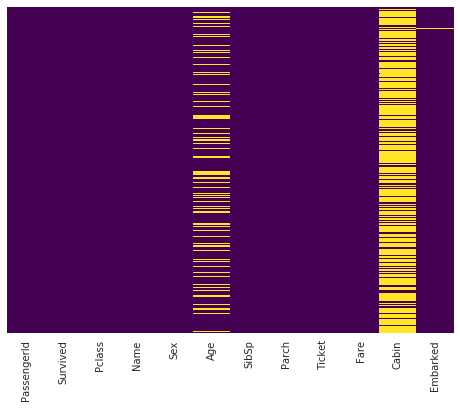

In [4]:
plt.figure(figsize=(8,6))
sns.heatmap(df1.isnull(), yticklabels=False, cbar=False, cmap='viridis') 

**Lot of null values on cabin**  
**Some null values on age**

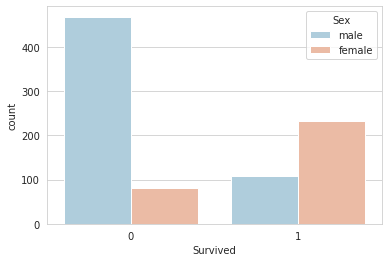

In [5]:
## Analysis by sex
sns.countplot(x='Survived',hue='Sex',data=df1, palette='RdBu_r')

**Most dead were men**

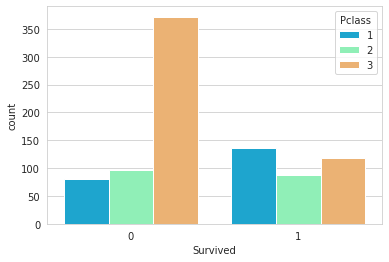

In [6]:
## Analysis by class 
sns.countplot(x='Survived',hue='Pclass',data=df1, palette='rainbow')

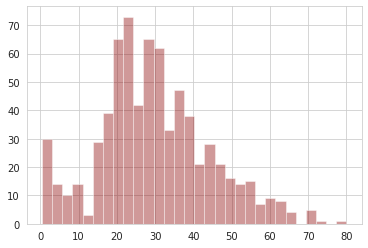

In [7]:
df1['Age'].hist(bins=30,color='darkred', alpha = 0.4)

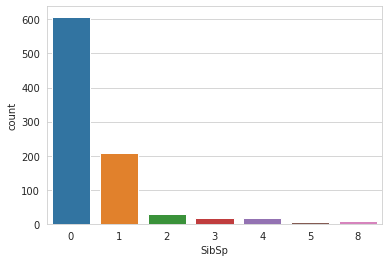

In [8]:
sns.countplot(x='SibSp', data = df1)

**Most passengers traveled alone**

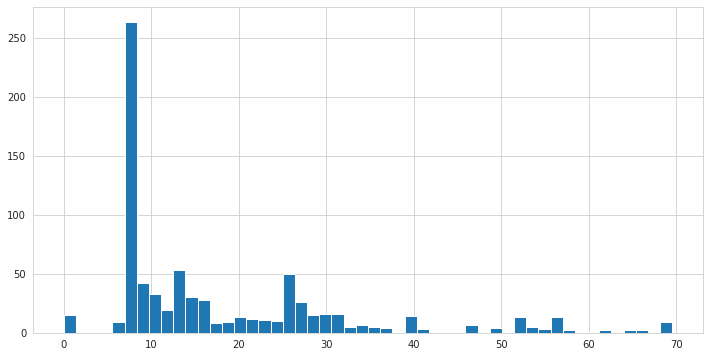

In [9]:
df1[df1['Fare']<70]['Fare'].hist(bins=50,figsize=(12,6))

**Most tickets were cheap <10 USD**

# Dealing with missing values

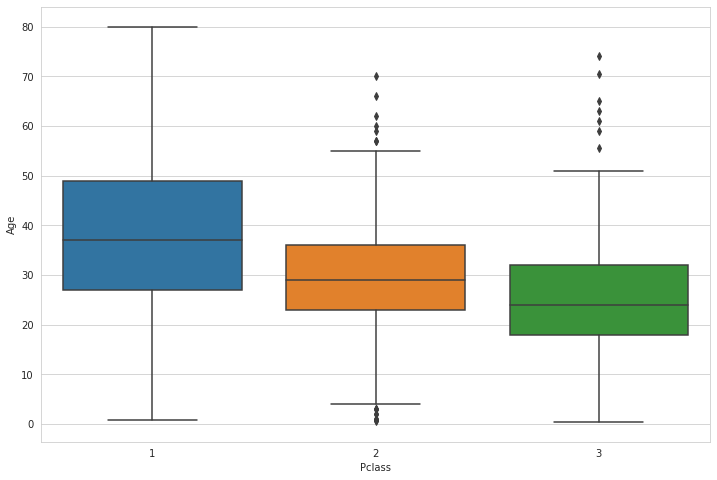

In [10]:
## Checking Age/Class (what do with missing values on age?)
plt.figure(figsize=(12,8))
sns.boxplot(x='Pclass',y='Age', data=df1)

**Better class, older person mean**  
**Fill missing values on age with class mean** 

In [11]:
def input_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass==1:
            return 37
        elif pclass==2:
            return 29
        else:
            return 24
    else:
        return age
    

In [12]:
df1['Age'] = df1[['Age','Pclass']].apply(input_age,axis=1)

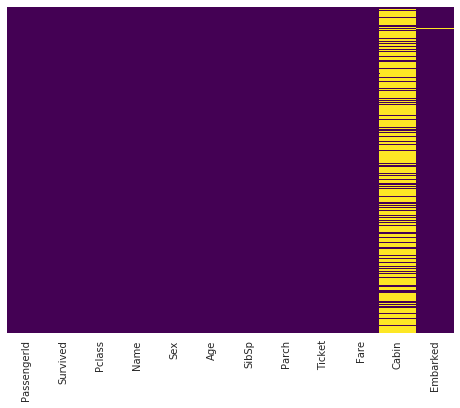

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df1.isnull(), yticklabels=False, cbar=False, cmap='viridis') 

**Age filled**

In [14]:
## Drop Cabin because to many values missing
del df1['Cabin']

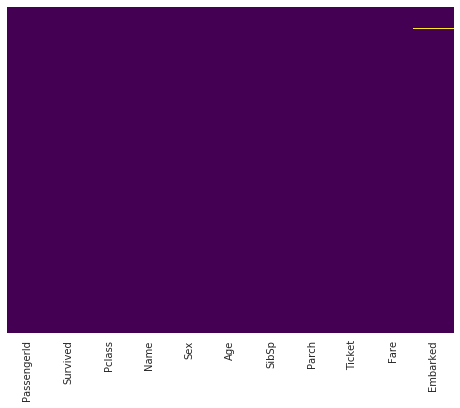

In [15]:
## Almost done, 1 missing value on embarked
plt.figure(figsize=(8,6))
sns.heatmap(df1.isnull(), yticklabels=False, cbar=False, cmap='viridis') 

In [16]:
df1.dropna(inplace=True)

In [17]:
df1.notnull().count() ## Ok, 889 filled

PassengerId    889
Survived       889
Pclass         889
Name           889
Sex            889
Age            889
SibSp          889
Parch          889
Ticket         889
Fare           889
Embarked       889
dtype: int64

In [18]:
sex = pd.get_dummies(df1['Sex'],drop_first=True)

In [19]:
embarked = pd.get_dummies(df1.Embarked, drop_first=True)

In [20]:
df1.drop(['Sex','PassengerId','Name','Ticket', 'Embarked'], axis=1,inplace=True)

In [21]:
train = pd.concat([df1,sex,embarked], axis=1)

In [22]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [24]:
x_train, x_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1),train['Survived'], test_size=0.3)

In [25]:
logmodel = LogisticRegression()

In [26]:
logmodel.fit(x_train,y_train)

/home/vinicius/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
predictions = logmodel.predict(x_test)

In [28]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       171
           1       0.75      0.66      0.70        96

    accuracy                           0.80       267
   macro avg       0.78      0.77      0.77       267
weighted avg       0.79      0.80      0.79       267



In [29]:
print(confusion_matrix(y_test,predictions))

[[150  21]
 [ 33  63]]
